In [5]:
import pandas as pd
import numpy as np

#creating a data frame and storing data in it
df = pd.read_csv("leukemia.tab", delimiter = '\t')

#dropping rows with NA value
df = df.drop([0,1,74])
print(df)

#replacing target variables' names with '0' and '1'
df.replace('ALL', 0, inplace=True)
df.replace('AML', 1, inplace=True)
print(df)

   gene AFFX-BioC-5_at hum_alu_at  ... L49218_f_at M71243_f_at Z78285_f_at
2   ALL             88      15091  ...          36         191         -37
3   ALL            283      11038  ...          11          76         -14
4   ALL            309      16692  ...          41         228         -41
5   ALL             12      15763  ...         -50         126         -91
6   ALL            168      18128  ...          14          56         -25
..  ...            ...        ...  ...         ...         ...         ...
69  AML            141      22818  ...         -22         260           5
70  AML             95      39323  ...           0        1777         -49
71  AML            146      15689  ...          -2         210          16
72  AML            431      41570  ...           0         284         -73
73  AML              9      39538  ...          20         379         -60

[72 rows x 5148 columns]
    gene AFFX-BioC-5_at hum_alu_at  ... L49218_f_at M71243_f_at Z78285_f_a

In [7]:
gini_child_list_index = []
gini_child_list = []

#iterating for all the columns in data frame
for col in df.columns:

  #sorting values of all the columns respective of the one column and storing that data in new data frame df1
  df1 = df.sort_values(by = [col])

  #storing values of column 'gene' in a target list in the order of that one sorted column
  target = df1[['gene']].values
  target = list(target)

  #dropping column 'gene' from df1  
  df1 = df1.drop(['gene'], axis = 1)
  
  #appending values of that sorted column in a list
  attr1 = []
  if col != 'gene' :
    for i in range(0,len(df1)):
      attr1.append(int(df1[[col]].values[i]))
  else: 
    continue
  
  #calculating mean of 2 consecutive values for the whole sorted column and appending all the mean values in a list named 'mean'
  mean = []
  for i in range(0,len(attr1)-1):
    c = (attr1[i] + attr1[i+1])/2
    mean.append(c)

  #dividing the whole column in 2 parts based on whether mean is greater or less than a certain value
  gini_child = []
  for j in range(len(mean)):
    n1 = []
    n2 = []
  
    for i in range(0,72):
      if attr1[i] < mean[j]:
        n1.append(attr1[i])
      else:
        n2.append(attr1[i])
    #print(len(n1),len(n2))
    
    #counting number of zeros and ones of target class in both the groups
    count1,count2,count3,count4 = 0,0,0,0
    for k in range(0,len(n1)):
      if target[k] == 0:
        count1+=1
      else:
        count2+=1
    for k in range(0,len(n2)):
      if target[k] == 0:
        count3+=1
      else:
        count4+=1
    #print(count1,count2,count3,count4) #count1 -> n1,all..., count2 -> n1,aml..., count3 -> n2,all..., count4 -> n2,aml
    #calculating gini index
    if count1 + count2 != 0 and count3 + count4 != 0:
      gini1 = 1 - (count1/(count1+count2))**2 - (count2/(count1+count2))**2
      gini2 = 1 - (count3/(count3+count4))**2 - (count4/(count3+count4))**2
      
      gini = (len(n1)/(len(n1)+len(n2)))*gini1 + (len(n2)/(len(n1)+len(n2)))*gini2
      gini_child.append(gini)
    else:
      continue
  #appending min gini index from all the columns
  gini_child_list.append(min(gini_child))
  
  

In [8]:
print(gini_child_list.index(min(gini_child_list)))

1673


In [9]:
#appending first 20 columns' index nos. with min gini index values
gini_child_list_new =[]
for i in gini_child_list:
  gini_child_list_new.append(i)
gini_child_list_new.sort()
final_index = []
for i in range(0,26):
  prev = gini_child_list.index(gini_child_list_new[i])
  if prev in final_index:
    continue
  else:
    final_index.append(gini_child_list.index(gini_child_list_new[i]))

final_index

[1673,
 4647,
 1907,
 2328,
 795,
 2836,
 2496,
 4530,
 996,
 1366,
 2968,
 632,
 2544,
 1701,
 2660,
 1555,
 662,
 1569,
 643]

In [10]:
#with the help of index nos. appending names of those 20 columns
col_list = []
final_col = []
for col in df1.columns:
  col_list.append(col)
for i in final_index:
  final_col.append(col_list[i])

print(final_col)

['M84526_at', 'M83667_rna1_s_at', 'U03270_at', 'U41635_at', 'J03473_at', 'U88047_at', 'U57094_at', 'M84371_rna1_s_at', 'L19437_at', 'M26683_at', 'X05908_at', 'HG1155-HT4822_at', 'U60319_at', 'M87860_at', 'U70867_at', 'M63138_at', 'HG2566-HT4867_at', 'M63835_at', 'HG1879-HT1919_at']


In [18]:
#y is a target class and x has selected features attributes
y = df['gene']
x = df[[c for c in final_col if c in df]]

feature_names = []
for i in final_col:
  feature_names.append(i)

from sklearn.model_selection import train_test_split#for decision tree object
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (57, 19)
Testing split input-  (15, 19)


In [19]:
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

#setting decision tree criteria which is by default is gini index
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')
dtree

Decision Tree Classifier Created


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
#creating classification report having accuracy and precision
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.67      1.00      0.80         4

    accuracy                           0.87        15
   macro avg       0.83      0.91      0.85        15
weighted avg       0.91      0.87      0.87        15



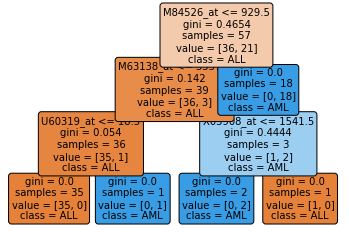

<Figure size 3600x3600 with 0 Axes>

In [16]:
#generating final decision tree
import matplotlib.pyplot as plt
dec_tree = plot_tree(decision_tree=dtree, feature_names = final_col, 
                     class_names =['ALL','AML'] , filled = True , precision =4 , rounded = True, fontsize=10)
plt.figure(figsize=(50,50), facecolor ='k')

plt.show()